In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
import numpy as np

In [2]:
def featureNormalize(X):
    size = np.shape(X)
    for feature in range(size[1]):
        currentSum = 0
        
        # Calculate the sum of the feature over all the entries and then divide by number of entries for the mean
        for entry in range(size[0]):
            currentSum += X[entry, feature]
            
        featureMean = currentSum / size[0]
        
        # Update the feature in every entry
        for entry in range(size[0]):
            X[entry, feature] = X[entry, feature] - featureMean
            
        # Update the feature in every entry by dividing by its standard deviation
        standardDeviation  = np.std(X[:, [feature]])
        #print(standardDeviation)
        for entry in range(size[0]):
            X[entry, feature] = X[entry, feature] / standardDeviation
    
    return X
    

In [3]:
f = open('machine-learning-ex1/ex1/ex1data2.txt', 'r')
data = np.loadtxt(f, delimiter=',')

X = data[:, [0, 1]]
y = data[:, 2]

normedX = featureNormalize(X)

#Add the column of 1's to the training data
ones = np.ones([np.shape(normedX)[0], 1])
normedX = np.hstack((ones, normedX))
print(normedX)

[[  1.00000000e+00   1.31415422e-01  -2.26093368e-01]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00]
 [  1.00000000e+00   1.27107075e+00   1.10220517e+00]
 [  1.00000000e+00  -1.99450507e-02   1.10220517e+00]
 [  1.00000000e+00  -5.93588523e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.29685755e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.89466782e-01  -2.26093368e-01]
 [  1.00000000e+00  -6.44465993e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.71822042e-02   1.10220517e+00]
 [  1.00000000e+00  -8.65999486e-04  -2.26093368e-01]
 [  1.00000000e+00  -1.40779041e-01  -2.26093368e-01]
 [  1.00000000e+00   3.15099326e+00   2.43050370e+00]
 [  1.00000000e+00  -9.31923697e-01  -2.26093368e-01]
 [  1.00000000e+00   3.80715024e-01   1.10220517e+00]
 [  1.00000000e+00  -8.65782986e-01  -1.55439190e+00]
 [  1.00000000e+00  -9.72625673e-01  -2.26093368e-01]
 [  1.00000000e+00   7.73743

In [4]:
# This uses mean squared errors as the error metric. This is often called J(theta) in formal notation
def costFunction(X, y, weights):
    currentCost = 0
    for pointIndex, point in enumerate(X):
        
        # Adding the squared error to the current sum total
        currentCost += (np.dot(point, weights) - y[pointIndex])**2
        
    meanSquaredErrors = currentCost / (np.shape(X)[0] * 2)
    
    return meanSquaredErrors

# Weights array initialised to zeros
weights =  np.zeros([np.shape(normedX)[1], 1])

# Returns a new weights vector updated with 1 run of batch gradient decent
def gradientDecent(X, y, weights):   

    # IMPORTANT. If the learning rate is too high, the algorithm will not find the optimum and tends to explode.
    # Too small and the algorithm will take a long time finding the optimum
    learningRate = 0.2
    
    tempWeights = np.copy(weights)
    
    # Calcuate the new weights. All weight updates are applied simultaniously
    for weightIndex, j in enumerate(weights):
        currentSum = 0
        
        # As this is batch gradient decent we will use all examples for updating the weight
        for pointIndex, point in enumerate(X): 

            # This is the partial differential for each weight/coefficent. 
            # They are summed over every example and then averaged later
            differential = (np.dot(point, weights) - y[pointIndex]) * point[weightIndex]
            currentSum += differential
 
        # Average the partial differentials and muultiply by the learning rate.
        tempWeights[weightIndex] = j - ((currentSum / np.shape(X)[0]) * learningRate)
    return tempWeights            

[[ 340407.80104264]
 [ 108868.21842418]
 [  -5998.77758838]]


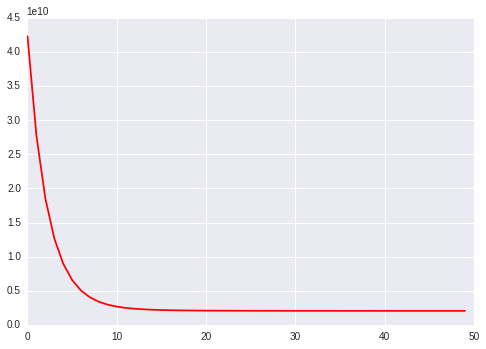

In [5]:
costArray = np.zeros([0,1])
for i in range(50):
    #updates the weights variable with the updated weigths returned by the algorithm
    weights =  gradientDecent(normedX, y, weights)

    # Gets the current mean squared error of the weights and appends it to the costArray for logging
    cost = np.array([costFunction(normedX, y, weights)])
    costArray = np.append(costArray, cost)
    
print(weights)

def graphCostArray(costArray, itterations):
    plt.plot(range(itterations), costArray[:itterations], "r")

graphCostArray(costArray, 50)